In [1]:
# Part 1: Data Loading and Basic Exploration
# File: notebooks/01_data_exploration.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

# Define file path
data_path = os.path.join("..", "data", "metadata.csv")

# Load the dataset
df = pd.read_csv(data_path)

# 1. Basic info
print("DataFrame Shape:", df.shape)
print("\nDataFrame Info:")
print(df.info())

# 2. Preview first few rows
print("\nFirst 5 rows:")
print(df.head())

# 3. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 4. Basic statistics for numerical columns
print("\nBasic Statistics:")
print(df.describe())

# 5. Save a small preview for reporting
output_folder = os.path.join("..", "outputs")
os.makedirs(output_folder, exist_ok=True)
df.head().to_csv(os.path.join(output_folder, "preview_metadata.csv"), index=False)

print("\nInitial data exploration complete. Preview saved in outputs/preview_metadata.csv")


C:\Users\HP\AppData\Local\Temp\ipykernel_17432\2787605215.py:16: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


DataFrame Shape: (1056660, 19)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  p

In [2]:
# Part 2: Data Cleaning and Preparation

import pandas as pd
import os

# Load the raw dataset
data_path = os.path.join("..", "data", "metadata.csv")
df = pd.read_csv(data_path)

# --- 1. Select important columns ---
important_cols = ['cord_uid', 'title', 'abstract', 'publish_time', 'journal', 'authors', 'source_x']
df_clean = df[important_cols].copy()

# --- 2. Handle missing values ---
# Drop rows where 'title' or 'publish_time' is missing (critical for analysis)
df_clean = df_clean.dropna(subset=['title', 'publish_time'])

# Fill missing 'abstract' with empty string
df_clean['abstract'] = df_clean['abstract'].fillna("")

# Fill missing 'journal' with 'Unknown'
df_clean['journal'] = df_clean['journal'].fillna("Unknown")

# --- 3. Convert publish_time to datetime ---
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')

# Drop rows where date conversion failed
df_clean = df_clean.dropna(subset=['publish_time'])

# --- 4. Extract year for time-based analysis ---
df_clean['year'] = df_clean['publish_time'].dt.year

# --- 5. Create new columns if needed ---
# Example: Abstract word count
df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(x.split()))

# --- 6. Save cleaned data for later use ---
output_folder = os.path.join("..", "outputs")
os.makedirs(output_folder, exist_ok=True)
cleaned_file = os.path.join(output_folder, "metadata_cleaned.csv")
df_clean.to_csv(cleaned_file, index=False)

# --- 7. Summary ---
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_clean.shape)
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

print(f"\nCleaned dataset saved to {cleaned_file}")


C:\Users\HP\AppData\Local\Temp\ipykernel_17432\802801027.py:8: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Original dataset shape: (1056660, 19)
Cleaned dataset shape: (518429, 9)

Missing values after cleaning:
cord_uid                   0
title                      0
abstract                   0
publish_time               0
journal                    0
authors                15565
source_x                   0
year                       0
abstract_word_count        0
dtype: int64

Cleaned dataset saved to ..\outputs\metadata_cleaned.csv


C:\Users\HP\AppData\Local\Temp\ipykernel_16820\724771647.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


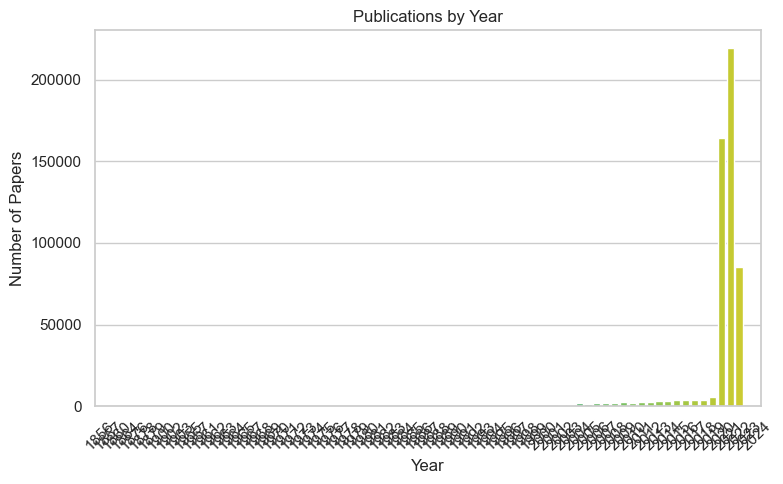

C:\Users\HP\AppData\Local\Temp\ipykernel_16820\724771647.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette="magma")


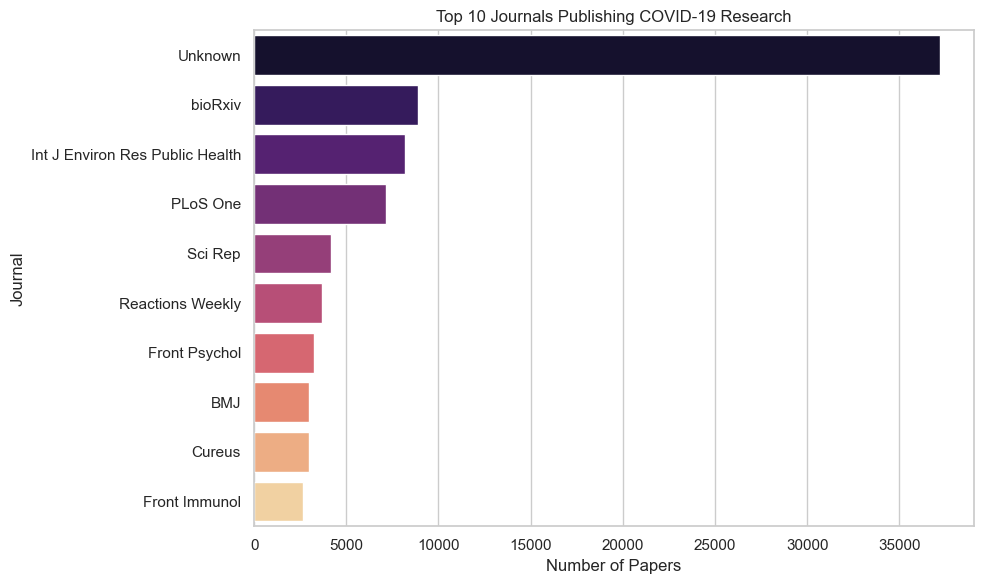

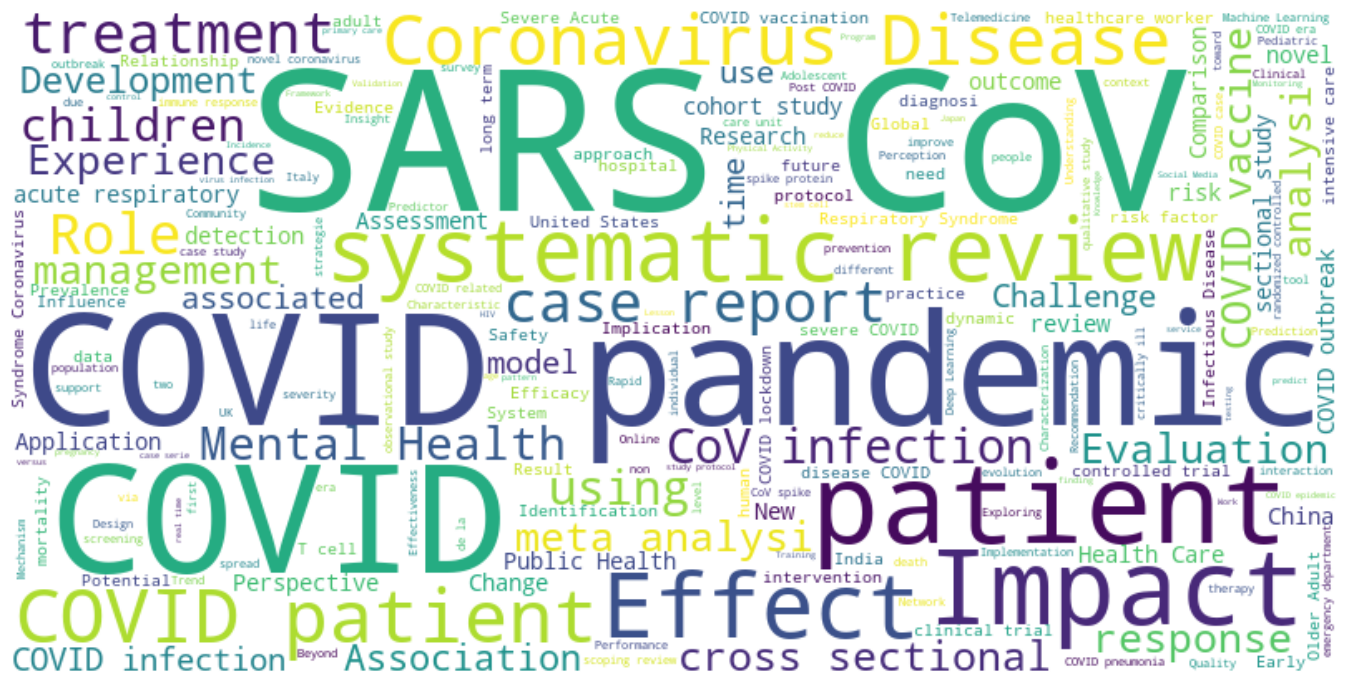

C:\Users\HP\AppData\Local\Temp\ipykernel_16820\724771647.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.values, y=source_counts.index, palette="coolwarm")


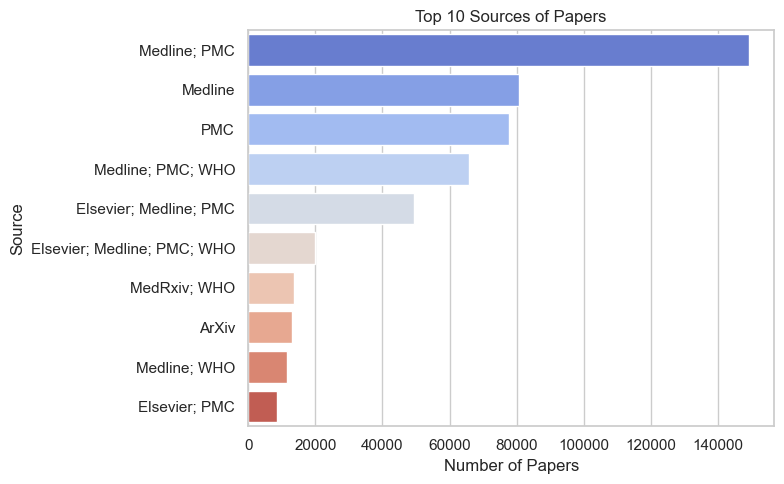


All figures saved in ..\outputs\figures


In [1]:
# Part 3: Data Analysis & Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# Set plot style
sns.set(style="whitegrid")

# Load the cleaned dataset
cleaned_file = os.path.join("..", "outputs", "metadata_cleaned.csv")
df = pd.read_csv(cleaned_file)

# Create folder for figures
figures_folder = os.path.join("..", "outputs", "figures")
os.makedirs(figures_folder, exist_ok=True)

# -------------------------------
# 1. Publications by Year
# -------------------------------
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(figures_folder, "publications_by_year.png"))
plt.show()

# -------------------------------
# 2. Top Journals
# -------------------------------
top_journals = df['journal'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="magma")
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.tight_layout()
plt.savefig(os.path.join(figures_folder, "top_journals.png"))
plt.show()

# -------------------------------
# 3. Word Cloud of Paper Titles
# -------------------------------
text = " ".join(title for title in df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(figures_folder, "titles_wordcloud.png"))
plt.show()

# -------------------------------
# 4. Paper Counts by Source
# -------------------------------
source_counts = df['source_x'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=source_counts.values, y=source_counts.index, palette="coolwarm")
plt.title("Top 10 Sources of Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Source")
plt.tight_layout()
plt.savefig(os.path.join(figures_folder, "papers_by_source.png"))
plt.show()

print(f"\nAll figures saved in {figures_folder}")
